In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()
df = pd.read_csv('titanic.csv')

In [2]:
#EDA
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#detect number of missing values
df.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

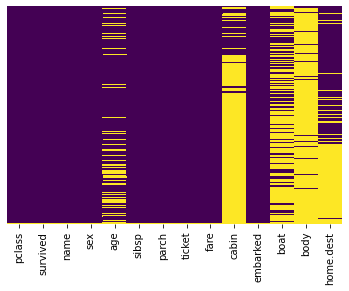

In [4]:
#Show the columns with null values (yellow)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#Drop the values with high null values no impact
df = df.drop("boat", axis=1)  
df = df.drop("body", axis=1)
df = df.drop('cabin', axis=1)
df = df.drop('home.dest', axis=1)
df = df.drop('name', axis = 1)
df = df.drop('ticket', axis = 1)

In [6]:
#Function to process and store an estimated age
def impute_age(cols):   
    Age = cols[0]    
    Pclass = cols[1]       
    if pd.isnull(Age):
        if Pclass == 1:           
            return 37
        elif Pclass == 2:           
            return 29
        else:           
            return 24
    else:        return Age

In [7]:
#Apply function to the age column
df['age'] = df.apply(impute_age, axis=1)

<AxesSubplot:>

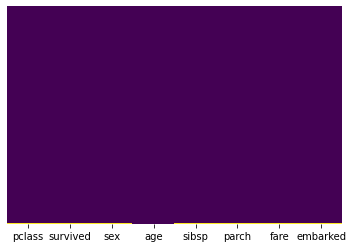

In [8]:
#Now nearly all non-null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Drop the non applicable to get all non-null counts shown with info
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   sex       1306 non-null   object 
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   float64
 5   parch     1306 non-null   float64
 6   fare      1306 non-null   float64
 7   embarked  1306 non-null   object 
dtypes: float64(6), object(2)
memory usage: 91.8+ KB


In [10]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,1.0,0.0,0.0,211.3375,S
1,1.0,1.0,male,1.0,1.0,2.0,151.5500,S
2,1.0,0.0,female,1.0,1.0,2.0,151.5500,S
3,1.0,0.0,male,1.0,1.0,2.0,151.5500,S
4,1.0,0.0,female,1.0,1.0,2.0,151.5500,S


In [11]:
print(df['sex'].unique())

['female' 'male']


In [12]:
#Change the values of sex to 0 or 1
def sex_toFloat(cols):      
    island = cols[2]
    if island == "female":           
        return 0
    else:       
        return 1

In [13]:
df['sex'] = df.apply(sex_toFloat, axis=1)
print(df['sex'].unique())

[0 1]


In [14]:
#Change the value of Embarked to 0, 1, or 2
def embarked_toFloat(cols):      
    island = cols[7]
    if island == "S":           
        return 1
    elif island == "C":           
        return 2
    else:           
        return 3

In [15]:
df['embarked'] = df.apply(embarked_toFloat, axis=1)
print(df['embarked'].unique())

[1 2 3]


In [16]:
#PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [17]:
scaled_data = scaler.transform(df)

In [18]:
scaled_data

array([[-1.54930064,  1.27376998, -1.34709137, ..., -0.44561167,
         3.44206278, -0.60438122],
       [-1.54930064,  1.27376998,  0.74234014, ...,  1.8637885 ,
         2.28666312, -0.60438122],
       [-1.54930064, -0.7850711 , -1.34709137, ...,  1.8637885 ,
         2.28666312, -0.60438122],
       ...,
       [ 0.84099663, -0.7850711 ,  0.74234014, ..., -0.44561167,
        -0.50243254,  0.92531233],
       [ 0.84099663, -0.7850711 ,  0.74234014, ..., -0.44561167,
        -0.50243254,  0.92531233],
       [ 0.84099663, -0.7850711 ,  0.74234014, ..., -0.44561167,
        -0.48987122, -0.60438122]])

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [20]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(1306, 8)
(1306, 2)


Text(0, 0.5, 'Second principal component')

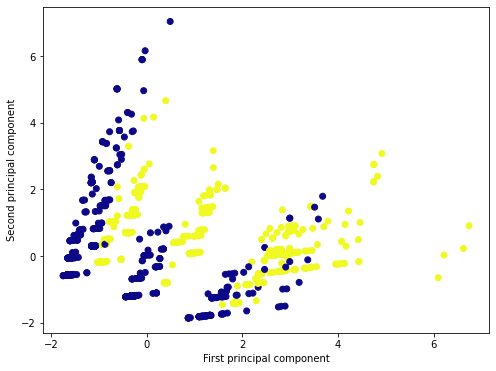

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['survived'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [23]:
#interpreting the components
#cost of PCA is not being able to easily understand what these components represent
pca.components_

array([[-0.54737253,  0.34708759, -0.25110769, -0.54737253,  0.03640547,
         0.10293621,  0.45254566,  0.0228683 ],
       [ 0.26550167,  0.19568742, -0.42067772,  0.26550167,  0.53852798,
         0.58914964,  0.08150236, -0.00145096]])

In [24]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


<AxesSubplot:>

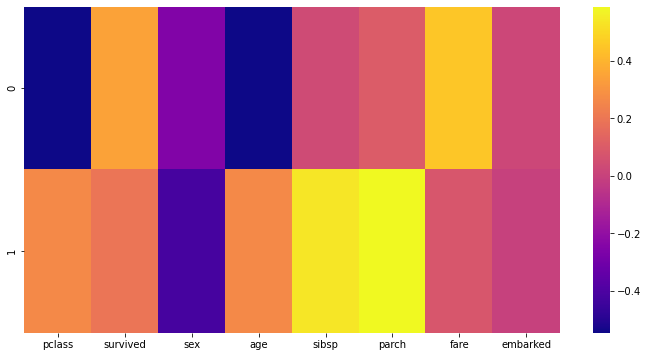

In [25]:
#Print heatmap correlation of two new components
print(df.columns)
df_comp = pd.DataFrame(pca.components_, columns=df.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [27]:
features = pca.components_

In [29]:
y = np.array(df.survived).reshape(-1, 1)

In [30]:
# we have 2 classes so the labels will have 2 values
# first class: (1,0) second class: (0,1)
encoder = OneHotEncoder()
targets = encoder.fit_transform(y).toarray()

In [31]:
train_features, test_features, train_targets, test_targets = train_test_split(x_pca, targets, test_size=0.2)
x_pca

array([[ 3.95699781, -0.2462164 ],
       [ 3.1821073 ,  0.65795259],
       [ 2.99218143,  1.13404059],
       ...,
       [-1.64912158, -0.58253237],
       [-1.64912158, -0.58253237],
       [-1.6784185 , -0.57928907]])

In [32]:
model = Sequential()
model.add(Dense(10, input_dim=2, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

In [33]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [35]:
model.fit(train_features, train_targets, epochs=50, verbose=2)
results = model.evaluate(test_features, test_targets, use_multiprocessing=True)

print("Training is finished... The loss and accuracy values are:")
print(results)

Epoch 1/50
33/33 - 0s - loss: 0.1309 - accuracy: 0.9559
Epoch 2/50
33/33 - 0s - loss: 0.1309 - accuracy: 0.9540
Epoch 3/50
33/33 - 0s - loss: 0.1309 - accuracy: 0.9483
Epoch 4/50
33/33 - 0s - loss: 0.1308 - accuracy: 0.9531
Epoch 5/50
33/33 - 0s - loss: 0.1308 - accuracy: 0.9483
Epoch 6/50
33/33 - 0s - loss: 0.1313 - accuracy: 0.9531
Epoch 7/50
33/33 - 0s - loss: 0.1308 - accuracy: 0.9492
Epoch 8/50
33/33 - 0s - loss: 0.1307 - accuracy: 0.9559
Epoch 9/50
33/33 - 0s - loss: 0.1306 - accuracy: 0.9502
Epoch 10/50
33/33 - 0s - loss: 0.1306 - accuracy: 0.9492
Epoch 11/50
33/33 - 0s - loss: 0.1306 - accuracy: 0.9569
Epoch 12/50
33/33 - 0s - loss: 0.1306 - accuracy: 0.9559
Epoch 13/50
33/33 - 0s - loss: 0.1305 - accuracy: 0.9579
Epoch 14/50
33/33 - 0s - loss: 0.1306 - accuracy: 0.9502
Epoch 15/50
33/33 - 0s - loss: 0.1304 - accuracy: 0.9531
Epoch 16/50
33/33 - 0s - loss: 0.1304 - accuracy: 0.9531
Epoch 17/50
33/33 - 0s - loss: 0.1303 - accuracy: 0.9540
Epoch 18/50
33/33 - 0s - loss: 0.1303 - 